# Twitter Sentiment Analysis

## Introduction
This project aims to analyze sentiments expressed in tweets using machine learning techniques. By classifying tweets into categories such as positive, negative, neutral, and irrelevant, the model provides insights into public opinions and trends. This analysis can be valuable for various applications, including market research, customer feedback analysis, and social media monitoring. The project leverages Natural Language Processing (NLP) for text preprocessing and a RandomForest classifier for sentiment prediction.

## Imports and Setup
In this cell, we import essential libraries for our analysis:

numpy for numerical operations

pandas for data manipulation

matplotlib.pyplot and seaborn for data visualization

warnings to ignore any unnecessary warnings for a cleaner output

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Training Data
Loading the training dataset from a CSV file named twitter_training.csv using pandas. The first three rows of the dataset are displayed to give an overview of its structure and contents.

In [2]:
train = pd.read_csv('twitter_training.csv')
train.head(3)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


## Loading the Testing Data
Loading the testing dataset from a CSV file named twitter_testing.csv using pandas. The first three rows of the dataset are displayed to give an overview of its structure and contents.

In [3]:
test = pd.read_csv('twitter_validation.csv')
test.head(3)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."


## Loading and Displaying the Data with Column Names

Defining the column names for the dataset.
Load the CSV file 'twitter_training.csv' and 'twitter_testing.csv' into a pandas dataframe, specifying the column names and handling quoted text properly.
Display the first three rows of the dataframe to inspect the initial data.

In [4]:
# Define the column names
column_names = ['id', 'company', 'sentiment', 'comment']

# Load the CSV file into a dataframe with specified column names
train = pd.read_csv('twitter_training.csv', header=None, names=column_names, quotechar='"')

# Display the first 3 rows of the train dataframe
train.head(3)

,id,company,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [5]:
# Define the column names
column_names = ['id', 'company', 'sentiment', 'comment']

# Load the CSV file into a dataframe with specified column names
test = pd.read_csv('twitter_validation.csv', header=None, names=column_names, quotechar='"')

# Display the first 3 rows of the test dataframe
test.head(3)

,id,company,sentiment,comment
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


## Sentiment Distribution
In this cell, we:

Convert the sentiment column in both the training and testing dataframes to the category data type for efficient memory usage and faster processing.
Calculate the count of distinct sentiment values in the training data.
Print the counts of each sentiment value to understand the distribution.
Visualize the sentiment distribution using a pie chart, providing a clear graphical representation of the proportions of different sentiments in the dataset.

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


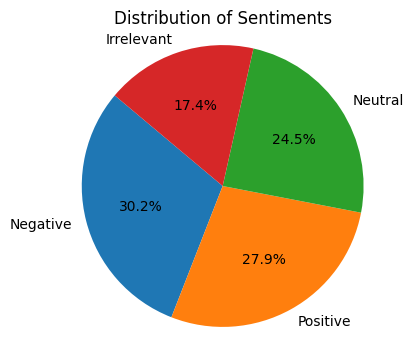

In [6]:
# Convert the 'sentiment' column to type category
train['sentiment'] = train['sentiment'].astype('category')
test['sentiment'] = test['sentiment'].astype('category')


sentiment_counts = train['sentiment'].value_counts()

# Display the counts of distinct sentiment values
print(sentiment_counts)

# Plot the sentiment counts using a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Data Cleaning: Dropping Unnecessary Columns
In this step, we clean the dataset by removing columns that are not needed for sentiment analysis. Specifically, we:

Drop the 'id' and 'company' columns from both the training and testing dataframes.
Display the first 3 rows of the cleaned train and test dataframes to verify the changes.
This cleaning process helps in focusing only on the relevant columns ('sentiment' and 'comment') for our analysis.

In [7]:
train = train.drop(columns=['id', 'company'])
test = test.drop(columns=['id', 'company'])
print(train.head(3))
print(test.head(3))

  sentiment                                            comment
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  I am coming to the borders and I will kill you...
2  Positive  im getting on borderlands and i will kill you ...
    sentiment                                            comment
0  Irrelevant  I mentioned on Facebook that I was struggling ...
1     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
2    Negative  @Microsoft Why do I pay for WORD when it funct...


## Data Overview: DataFrame Information
In this step, we display the information about the train and test dataframes using the info() method. This provides a concise summary of the dataframe

In [8]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sentiment  74682 non-null  category
 1   comment    73996 non-null  object  
dtypes: category(1), object(1)
memory usage: 656.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sentiment  1000 non-null   category
 1   comment    1000 non-null   object  
dtypes: category(1), object(1)
memory usage: 9.1+ KB
None


In [9]:
print(train.shape)
print(test.shape)

(74682, 2)
(1000, 2)


## Data Cleaning: Dropping Null and Duplicates Rows
In this step, we clean the dataset by removing Null and Duplicates Rows that are not needed for sentiment analysis. Specifically, we:

In [10]:
print(train.isnull().sum())
print(test.isnull().sum())

sentiment      0
comment      686
dtype: int64
sentiment    0
comment      0
dtype: int64


In [14]:
train.dropna(inplace=True)

In [11]:
print(train.duplicated().sum())
print(test.duplicated().sum())

4909
1


In [12]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [13]:
print(train.shape)
print(test.shape)

(69773, 2)
(999, 2)


## Data Cleaning: Sentiment Mapping
In this step, we perform the following actions to prepare our data for machine learning:

1. Column Name Stripping: Remove any leading or trailing spaces from the column names in both train and test dataframes. This helps to avoid potential issues during data manipulation and analysis.

2. Sentiment Mapping: Convert sentiment labels from categorical string values ('Negative', 'Neutral', 'Positive', 'Irrelevant') to numeric values. This is necessary for training machine learning models. 

In [15]:
# Remove leading/trailing spaces from column names if necessary
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# Map sentiment labels to numeric values
sentiment_mapping = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
    'Irrelevant': 2
}

train['sentiment'] = train['sentiment'].map(sentiment_mapping)
test['sentiment'] = test['sentiment'].map(sentiment_mapping)

# Check if the mapping was successful
print(train.head())
print(test.head())

  sentiment                                            comment
0         1  im getting on borderlands and i will murder yo...
1         1  I am coming to the borders and I will kill you...
2         1  im getting on borderlands and i will kill you ...
3         1  im coming on borderlands and i will murder you...
4         1  im getting on borderlands 2 and i will murder ...
  sentiment                                            comment
0         2  I mentioned on Facebook that I was struggling ...
1         0  BBC News - Amazon boss Jeff Bezos rejects clai...
2        -1  @Microsoft Why do I pay for WORD when it funct...
3        -1  CSGO matchmaking is so full of closet hacking,...
4         0  Now the President is slapping Americans in the...


In [16]:
print(train.describe())
print(test.describe())

        sentiment comment
count       69769   69769
unique          4   69491
top            -1      It
freq        21237       4
        sentiment                                            comment
count         999                                                999
unique          4                                                999
top             0  I mentioned on Facebook that I was struggling ...
freq          285                                                  1


## Data Preprocessing: Sentiment Category Conversion
In this step:

1. Type Conversion: Convert the 'sentiment' column in both the train and test dataframes to categorical type using .astype('category'). Categorical type is beneficial for columns with a fixed number of possible values (like sentiment labels) as it can save memory and speed up operations.

2. Counting Sentiment Values: Calculate the frequency of each sentiment category in the train dataframe using .value_counts(). This provides insights into the distribution of sentiments in the dataset.

In [17]:
# Convert the 'sentiment' column to type category
train['sentiment'] = train['sentiment'].astype('category')
test['sentiment'] = test['sentiment'].astype('category')


sentiment_counts = train['sentiment'].value_counts()

# Display the counts of distinct sentiment values
print(sentiment_counts)

sentiment
-1    21237
 1    19138
 0    17110
 2    12284
Name: count, dtype: int64


## Data Preprocessing for NLP

Import Libraries and Download NLTK Resources

1. Importing Libraries and NLTK Resources: Imports necessary libraries and downloads NLTK resources for tokenization, stopwords, and WordNet.
2. Initializing and Using NLTK's WordNet Lemmatizer: Initializes the WordNet lemmatizer from NLTK for text normalization.
3. Defining the Preprocessing Function: Defines a function preprocess_text that tokenizes, lowers case, removes punctuation and stopwords, and lemmatizes text data.
4. Applying Preprocessing Function: Applies preprocess_text function to the 'comment' column in both the train and test datasets.
5. Verification: Prints the first 3 rows of both datasets after preprocessing to ensure data transformation was successful.
   
This structure helps in understanding the flow of your NLP preprocessing pipeline, making your code clear and easy to follow for others reviewing or working with it. Adjust paths and details as per your specific project needs.


In [18]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (you only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK's WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for NLP preprocessing
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenization
        tokens = word_tokenize(text)

        # Lowercasing
        tokens = [token.lower() for token in tokens]

        # Removing punctuation
        tokens = [token for token in tokens if token not in string.punctuation]

        # Removing stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # Lemmatization
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Join the tokens back into a single string
        processed_text = ' '.join(tokens)

        return processed_text
    else:
        return ''  # Return empty string for non-string values

# Apply the preprocessing function to the 'genres_and_tags_str' column
train['comment'] = train['comment'].apply(preprocess_text)
test['comment'] = test['comment'].apply(preprocess_text)

# Display the first few rows to verify
print(train.head(3))
print(test.head(3))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  sentiment                       comment
0         1  im getting borderland murder
1         1            coming border kill
2         1    im getting borderland kill
  sentiment                                            comment
0         2  mentioned facebook struggling motivation go ru...
1         0  bbc news amazon bos jeff bezos reject claim co...
2        -1  microsoft pay word function poorly samsungus c...


## TF-IDF Vectorization

1. Importing Libraries: Imports the necessary library for TF-IDF vectorization.
2. Initializing TF-IDF Vectorizer: Initializes the TF-IDF vectorizer.
3. Fit and Transform on Training Data: Fits and transforms the vectorizer on the training data to learn the vocabulary and create the TF-IDF matrix.
4. Transform Test Data: Transforms the test data using the fitted vectorizer to maintain consistency in feature space.
5. Display Transformed Data Shapes: Prints the shapes of the TF-IDF matrices for both the training and test data to verify the transformation was successful.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training data
train_tfidf = tfidf_vectorizer.fit_transform(train['comment'])

# Transform the test data using the fitted vectorizer
test_tfidf = tfidf_vectorizer.transform(test['comment'])

# Display the shape of the transformed data
print("Shape of TF-IDF matrix for training data:", train_tfidf.shape)
print("Shape of TF-IDF matrix for test data:", test_tfidf.shape)


Shape of TF-IDF matrix for training data: (69769, 28841)
Shape of TF-IDF matrix for test data: (999, 28841)


## Logistic Regression Model Training and Evaluation

1. Import Libraries: Imports necessary libraries for Logistic Regression modeling and evaluation.
2. Initialize Logistic Regression Model: Initializes a Logistic Regression model.
3. Train the Model: Fits the model on the TF-IDF features (train_tfidf) and corresponding sentiment labels (train['sentiment']).
4. Make Predictions: Uses the trained model to predict sentiment labels for the test data (test_tfidf).
5. Evaluate Model Performance: Computes the accuracy score of the model predictions against the actual sentiment labels in the test set and prints it.
6. Display Classification Report: Prints the classification report, which includes precision, recall, F1-score, and support for each sentiment class based on the model predictions and actual labels.
7. 
This code provides a structured overview of your Logistic Regression model training, prediction, and evaluation process,

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model on the TF-IDF features and sentiment labels
model.fit(train_tfidf, train['sentiment'])

# Predict sentiment labels for test data
predictions = model.predict(test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(test['sentiment'], predictions)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(test['sentiment'], predictions))


Accuracy: 0.9159

Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.95      0.92       266
           0       0.96      0.90      0.93       285
           1       0.90      0.91      0.90       276
           2       0.91      0.90      0.90       172

    accuracy                           0.92       999
   macro avg       0.92      0.91      0.91       999
weighted avg       0.92      0.92      0.92       999



## Decision Tree Model Training and Evaluation

1. Import Libraries: Imports necessary libraries for Decision Tree modeling and evaluation.
2. Initialize Decision Tree Model: Initializes a Decision Tree classifier model.
3. Train the Model: Fits the model on the TF-IDF features (train_tfidf) and corresponding sentiment labels (train['sentiment']).
4. Make Predictions: Uses the trained Decision Tree model to predict sentiment labels for the test data (test_tfidf).
5. Evaluate Model Performance: Computes the accuracy score of the Decision Tree model predictions against the actual sentiment labels in the test set and prints it.
6. Display Classification Report: Prints the classification report, which includes precision, recall, F1-score, and support for each sentiment class based on the Decision Tree model predictions and actual labels.
   
This code organizes the Decision Tree model training, prediction, and evaluation process.

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model on the TF-IDF features and sentiment labels
dt_model.fit(train_tfidf, train['sentiment'])

# Predict sentiment labels for test data using the trained model
dt_predictions = dt_model.predict(test_tfidf)

# Evaluate Decision Tree model performance
dt_accuracy = accuracy_score(test['sentiment'], dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

# Display Decision Tree classification report
print('\nDecision Tree Classification Report:')
print(classification_report(test['sentiment'], dt_predictions))

Decision Tree Accuracy: 0.8929

Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.94      0.91       266
           0       0.90      0.87      0.89       285
           1       0.88      0.89      0.88       276
           2       0.91      0.85      0.88       172

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



## Random Forest Model Training and Evaluation

1. Import Libraries: Imports necessary libraries for Random Forest modeling and evaluation.
2. Initialize Random Forest Model: Initializes a Random Forest classifier model.
3. Train the Model: Fits the model on the TF-IDF features (train_tfidf) and corresponding sentiment labels (train['sentiment']).
4. Make Predictions: Uses the trained Random Forest model to predict sentiment labels for the test data (test_tfidf).
5. Evaluate Model Performance: Computes the accuracy score of the Random Forest model predictions against the actual sentiment labels in the test set and prints it.
6. Display Classification Report: Prints the classification report, which includes precision, recall, F1-score, and support for each sentiment class based on the Random Forest model predictions and actual labels.
   
This code outlines the Random Forest model training, prediction, and evaluation process.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model on the TF-IDF features and sentiment labels
rf_model.fit(train_tfidf, train['sentiment'])

# Predict sentiment labels for test data using the trained model
rf_predictions = rf_model.predict(test_tfidf)

# Evaluate Random Forest model performance
rf_accuracy = accuracy_score(test['sentiment'], rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Display Random Forest classification report
print('\nRandom Forest Classification Report:')
print(classification_report(test['sentiment'], rf_predictions))


Random Forest Accuracy: 0.9510

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       266
           0       0.93      0.95      0.94       285
           1       0.95      0.96      0.96       276
           2       1.00      0.89      0.94       172

    accuracy                           0.95       999
   macro avg       0.96      0.95      0.95       999
weighted avg       0.95      0.95      0.95       999



## Gradient Boosting Model Training and Evaluation

1. Import Libraries: Imports necessary libraries for Gradient Boosting modeling and evaluation.
2. Initialize Gradient Boosting Model: Initializes a Gradient Boosting classifier model.
3. Train the Model: Fits the model on the TF-IDF features (train_tfidf) and corresponding sentiment labels (train['sentiment']).
4. Make Predictions: Uses the trained Gradient Boosting model to predict sentiment labels for the test data (test_tfidf).
5. Evaluate Model Performance: Computes the accuracy score of the Gradient Boosting model predictions against the actual sentiment labels in the test set and prints it.
6. Display Classification Report: Prints the classification report, which includes precision, recall, F1-score, and support for each sentiment class based on the Gradient Boosting model predictions and actual labels.
   
This markdown structure summarizes the Gradient Boosting model training, prediction, and evaluation process.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model on the TF-IDF features and sentiment labels
gb_model.fit(train_tfidf, train['sentiment'])

# Predict sentiment labels for test data using the trained model
gb_predictions = gb_model.predict(test_tfidf)

# Evaluate Gradient Boosting model performance
gb_accuracy = accuracy_score(test['sentiment'], gb_predictions)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.4f}')

# Display Gradient Boosting classification report
print('\nGradient Boosting Classification Report:')
print(classification_report(test['sentiment'], gb_predictions))


Gradient Boosting Accuracy: 0.5886

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

          -1       0.48      0.83      0.61       266
           0       0.67      0.54      0.60       285
           1       0.65      0.59      0.62       276
           2       0.83      0.28      0.42       172

    accuracy                           0.59       999
   macro avg       0.66      0.56      0.56       999
weighted avg       0.64      0.59      0.58       999



## Saving Models and Dataframes

1. Import Libraries: Imports the pickle module for saving Python objects.
2. Save RandomForest Model: Saves the trained RandomForest model (rf_model) as a .pkl file using pickle.dump().
3. Save TF-IDF Vectorizer: Saves the TF-IDF vectorizer (tfidf_vectorizer) used for transforming text data into numerical features.
4. Print Confirmation: Prints a message confirming successful saving of models and dataframes.
   
This code documents the process of saving your RandomForest model and TF-IDF vectorizer, ensuring clarity.

In [29]:
import pickle

# Save RandomForest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save train and test dataframes
# train.to_pickle('train_data.pkl')
# test.to_pickle('test_data.pkl')

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print("Models and dataframes saved successfully.")


Models and dataframes saved successfully.


## Saving Dataframes as NumPy Arrays

1. Import Libraries: Imports the numpy module for array operations.
2. Convert Dataframes to NumPy Arrays: Converts the train and test dataframes to NumPy arrays using the to_numpy() method.
3. Save NumPy Arrays as .npy Files: Saves the NumPy arrays (train_array and test_array) as .npy files using np.save().
4. Print Confirmation: Prints a message confirming successful saving of dataframes as NumPy arrays.
   
This code documents the process of converting and saving your dataframes as NumPy arrays

In [ ]:
import numpy as np

# Convert dataframes to NumPy arrays
train_array = train.to_numpy()
test_array = test.to_numpy()

# Save NumPy arrays as .npy files
np.save('train_data.npy', train_array)
np.save('test_data.npy', test_array)

print("Dataframes saved as .npy files successfully.")


Dataframes saved as .npy files successfully.


## Sentiment Prediction Example

1. Import Libraries: Imports necessary libraries including nltk, pickle, numpy, and classes from nltk.corpus, nltk.tokenize, and nltk.stem.
2. Load Trained Models and NLTK Resources: Loads the trained Random Forest model (rf_model.pkl), TF-IDF vectorizer (vectorizer.pkl), and downloads NLTK resources (punkt, stopwords, wordnet).
3. Define NLP Preprocessing Function: Defines a function (preprocess_text) for tokenization, lowercasing, removing punctuation and stopwords, and lemmatization.
4. Example Sentiment Prediction: Provides an example (sentence) for sentiment prediction using the loaded model and vectorizer, demonstrating how to preprocess text and predict sentiment.
   
This code documents the process of sentiment prediction using the loaded model and vectorizer

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
import pickle

# Load the trained RandomForest model
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Load the TF-IDF vectorizer (replace 'vectorizer.pkl' with your saved vectorizer file)
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Define NLTK resources (you only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK's WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for NLP preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Example sentence to predict sentiment
sentence = "I really enjoyed the movie, it was fantastic!"

# Preprocess the sentence
processed_sentence = preprocess_text(sentence)

# Transform the preprocessed sentence using the loaded vectorizer
sentence_tfidf = vectorizer.transform([processed_sentence])

# Predict sentiment label for the sentence
predicted_sentiment = rf_model.predict(sentence_tfidf)

# Print the predicted sentiment label
print(f"Predicted Sentiment: {predicted_sentiment[0]}")

Predicted Sentiment: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Sentiment Analysis Example Using Trained Model

1. Import Libraries: Imports necessary libraries including nltk, pickle, numpy, and classes from nltk.corpus, nltk.tokenize, and nltk.stem.
2. Load Trained Model and Vectorizer: Loads the trained Random Forest model (rf_model.pkl) and TF-IDF vectorizer (vectorizer.pkl), and downloads NLTK resources (punkt, stopwords, wordnet).
3. Define NLP Preprocessing Function: Defines a function (preprocess_text) for tokenization, lowercasing, removing punctuation and stopwords, and lemmatization.
4. Example Sentiment Analysis: Provides an example (sentence) for sentiment analysis using the loaded model and vectorizer, demonstrating how to preprocess text, predict sentiment, and map sentiment labels to categories.

This code documents the process of sentiment analysis using the loaded model and vectorizer

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
import pickle

# Load the trained RandomForest model
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Load the TF-IDF vectorizer (replace 'vectorizer.pkl' with your saved vectorizer file)
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Define NLTK resources (you only need to do this once)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Initialize NLTK's WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for NLP preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Example sentence to predict sentiment
sentence = "Hate bad austonish"

# Preprocess the sentence
processed_sentence = preprocess_text(sentence)

# Transform the preprocessed sentence using the loaded vectorizer
sentence_tfidf = vectorizer.transform([processed_sentence])

# Predict sentiment label for the sentence
predicted_sentiment = rf_model.predict(sentence_tfidf)

# Print the predicted sentiment label
# print(f"Predicted Sentiment: {predicted_sentiment[0]}")

# Mapping dictionary
sentiment_mapping_reverse = {
    -1: 'Negative',
    0: 'Neutral',
    1: 'Positive',
    2: 'Irrelevant'
}

# Print the predicted sentiment category
predicted_category = sentiment_mapping_reverse.get(predicted_sentiment[0], 'Unknown')
print(f"Predicted Sentiment Category: {predicted_category}")


Predicted Sentiment Category: Negative
